In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [18]:
# Get the stock quote
import yfinance as yf 
msft = yf.Ticker("MSFT")
msft = msft.history(period="max")
msft

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.055004,0.063093,0.055004,0.060396,1031788800,0.00,0.0
1986-03-14 00:00:00-05:00,0.060396,0.063632,0.060396,0.062553,308160000,0.00,0.0
1986-03-17 00:00:00-05:00,0.062553,0.064172,0.062553,0.063632,133171200,0.00,0.0
1986-03-18 00:00:00-05:00,0.063632,0.064172,0.061475,0.062014,67766400,0.00,0.0
1986-03-19 00:00:00-05:00,0.062014,0.062553,0.060396,0.060936,47894400,0.00,0.0
...,...,...,...,...,...,...,...
2023-08-14 00:00:00-04:00,320.711012,323.375354,319.403752,323.355408,18836100,0.00,0.0
2023-08-15 00:00:00-04:00,322.317568,324.403149,320.221999,321.179962,16966300,0.00,0.0
2023-08-16 00:00:00-04:00,320.799988,324.420013,319.799988,320.399994,20698900,0.68,0.0


In [19]:
msft.index = pd.to_datetime(msft.index).strftime('%Y-%m-%d')
msft.index = pd.to_datetime(msft.index)
msft.index

DatetimeIndex(['1986-03-13', '1986-03-14', '1986-03-17', '1986-03-18',
               '1986-03-19', '1986-03-20', '1986-03-21', '1986-03-24',
               '1986-03-25', '1986-03-26',
               ...
               '2023-08-07', '2023-08-08', '2023-08-09', '2023-08-10',
               '2023-08-11', '2023-08-14', '2023-08-15', '2023-08-16',
               '2023-08-17', '2023-08-18'],
              dtype='datetime64[ns]', name='Date', length=9435, freq=None)

In [20]:
# Choose the column to predict (e.g., 'Close' price)
target_column = 'Close'
msft = msft[[target_column]]
msft

,Close
Date,
1986-03-13,0.060396
1986-03-14,0.062553
1986-03-17,0.063632
1986-03-18,0.062014
1986-03-19,0.060936
...,...
2023-08-14,323.355408
2023-08-15,321.179962
2023-08-16,320.399994


In [21]:
# Normalize data to values between 0 and 1
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(msft)

In [22]:
# Split data into train and test sets
train_size = int(len(data_scaled) * 0.8)
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

In [23]:
# Define a function to create sequences for input and output
def create_sequences(msft, sequence_length):
    X, y = [], []
    for i in range(len(msft) - sequence_length):
        X.append(msft[i:i+sequence_length])
        y.append(msft[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 10  # Number of time steps to look back
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

In [24]:
# Build the RNN model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [25]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/50
212/212 [==============================] - 5s 12ms/step - loss: 7.9265e-05 - val_loss: 8.9157e-05
Epoch 2/50
212/212 [==============================] - 3s 13ms/step - loss: 2.3915e-06 - val_loss: 8.8395e-05
Epoch 3/50
212/212 [==============================] - 3s 13ms/step - loss: 2.3674e-06 - val_loss: 8.4143e-05
Epoch 4/50
212/212 [==============================] - 2s 11ms/step - loss: 2.9393e-06 - val_loss: 8.3434e-05
Epoch 5/50
212/212 [==============================] - 2s 11ms/step - loss: 2.5442e-06 - val_loss: 7.7373e-05
Epoch 6/50
212/212 [==============================] - 3s 12ms/step - loss: 2.2615e-06 - val_loss: 7.6219e-05
Epoch 7/50
212/212 [==============================] - 3s 14ms/step - loss: 2.3694e-06 - val_loss: 6.5491e-05
Epoch 8/50
212/212 [==============================] - 2s 10ms/step - loss: 2.4103e-06 - val_loss: 7.9947e-05
Epoch 9/50
212/212 [==============================] - 2s 9ms/step - loss: 2.2350e-06 - val_loss: 7.7535e-05
Epoch 10/50
212/212 

In [26]:
# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Training Loss: {train_loss}, Testing Loss: {test_loss}')

Training Loss: 1.4937432979422738e-06, Testing Loss: 0.004336363635957241


In [27]:
# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

59/59 [==============================] - 0s 8ms/step


In [28]:
# Inverse transform predictions to original scale
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

In [30]:
msft

,Close
Date,
1986-03-13,0.060396
1986-03-14,0.062553
1986-03-17,0.063632
1986-03-18,0.062014
1986-03-19,0.060936
...,...
2023-08-14,323.355408
2023-08-15,321.179962
2023-08-16,320.399994


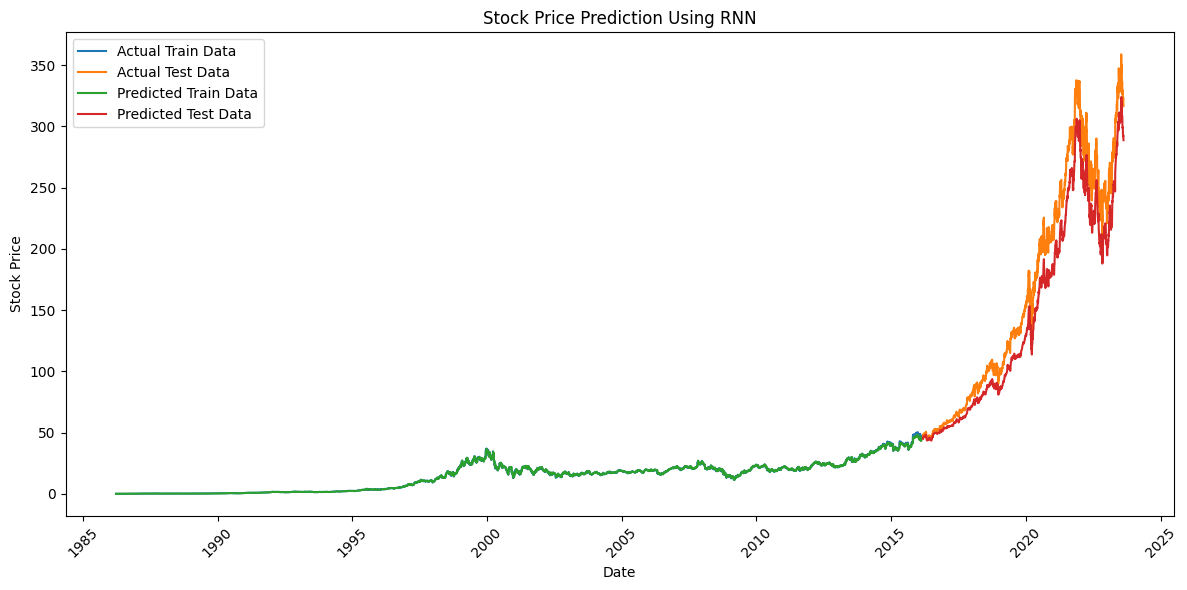

In [38]:
# Plot the results
plt.figure(figsize=(12, 6))

plt.plot(msft.index[sequence_length:sequence_length+len(train_predictions)], msft['Close'][sequence_length:sequence_length+len(train_predictions)], label='Actual Train Data')
plt.plot(msft.index[train_size+sequence_length:], msft['Close'][train_size+sequence_length:], label='Actual Test Data')
plt.plot(msft.index[sequence_length:sequence_length+len(train_predictions)], train_predictions, label='Predicted Train Data')
plt.plot(msft.index[train_size+sequence_length:], test_predictions, label='Predicted Test Data')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction Using RNN')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
